In [3]:
!pip install -r requirements.txt

Obtaining gym_idsgame from git+https://github.com/Limmen/gym-idsgame.git@d10830fef55308d383c98b41b34688a7fceae357#egg=gym_idsgame (from -r requirements.txt (line 4))
  Cloning https://github.com/Limmen/gym-idsgame.git (to revision d10830fef55308d383c98b41b34688a7fceae357) to ./src/gym-idsgame
  Running command git clone --filter=blob:none --quiet https://github.com/Limmen/gym-idsgame.git /content/Healthcare-Cyber-Security-with-SARSA-DDQN/src/gym-idsgame
  Running command git rev-parse -q --verify 'sha^d10830fef55308d383c98b41b34688a7fceae357'
  Running command git fetch -q https://github.com/Limmen/gym-idsgame.git d10830fef55308d383c98b41b34688a7fceae357
  Running command git checkout -q d10830fef55308d383c98b41b34688a7fceae357
  Encountered 10 file(s) that should have been pointers, but weren't:
        experiments/training/v7/maximal_attack/tabular_q_learning/docs/avg_summary.png
        experiments/training/v7/maximal_attack/tabular_q_learning/docs/episode_0.gif
        experiments/

In [10]:
import os
import gymnasium as gym
import warnings
import numpy
from datetime import datetime

from gym_idsgame.agents.training_agents.q_learning.q_agent_config import QAgentConfig
from gym_idsgame.experiments.util import util
from agents.sarsa_agent import SARSAAgent
from utils.utils import get_output_dir, print_summary
from environment.compatibility_wrapper import GymCompatibilityWrapper

%matplotlib inline
warnings.filterwarnings('ignore')

In [30]:
random_seed = 33
output_dir = get_output_dir(algorithm='sarsa')
util.create_artefact_dirs(output_dir, random_seed)

sarsa_config = QAgentConfig(
    gamma=0.995,
    alpha=0.001,
    epsilon=0.95,
    min_epsilon=0.01,
    epsilon_decay=0.9995,

    num_episodes=25000,
    train_log_frequency=200,
    eval_log_frequency=5,
    eval_frequency=750,
    eval_episodes=100,

    attacker=False,
    defender=True,

    render=False,
    eval_render=False,
    video=True,
    gifs=True,
    video_frequency=250,
    video_fps=6,
    video_dir=output_dir + "/results/videos/" + str(random_seed),
    gif_dir=output_dir + "/results/gifs/" + str(random_seed),
    save_dir=output_dir + "/results/data/" + str(random_seed)
)

print("Configuration initialized!")
print(f"Output directory: {output_dir}")

Configuration initialized!
Output directory: results/training/sarsa_2025-04-11_19-49-12


In [27]:
env_name = "idsgame-random_attack-v8"
env = gym.make(env_name, save_dir=output_dir + "results/data/" + str(random_seed))
env = GymCompatibilityWrapper(env)

print("\nEnvironment Information:")
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")
print(f"Defender Action Space: {env.defender_action_space}")


Environment Information:
Observation Space: Box(0, 9, (1, 11), int32)
Action Space: Discrete(30)
Defender Action Space: Discrete(33)


In [29]:
sarsa_agent = SARSAAgent(env, sarsa_config)

print("Starting training...")
train_result, eval_result = sarsa_agent.train()
print("Training completed!")

[Train] episode: 0.00 epsilon:0.95,avg_a_R:-1.00,avg_d_R:1.00,avg_t:6.00,avg_h:0.00,acc_A_R:0.00,acc_D_R:0.00,A_loss:0.000000,D_loss:0.000000,replay_s:-1,lr:1.00E-03,c_h:0.00:   0%|          | 0/25000 [00:00<?, ?it/s]

Starting training...



Eval Episode:   0%|          | 0/100 [00:00<?, ?it/s]
[Eval] avg_a_R:0.00,avg_d_R:0.00,avg_t:0.00,avg_h:0.00,acc_A_R:0.00,acc_D_R:0.00:   0%|          | 0/100 [00:00<?, ?it/s]
[Eval] episode:0,avg_a_R:-1.00,avg_d_R:1.00,avg_t:2.00,avg_h:0.00,acc_A_R:-1.00,acc_D_R:1.00,replay_s:-1,lr:0.00E+00,c_h:0.00:   0%|          | 0/100 [00:00<?, ?it/s]
[Eval] episode:5,avg_a_R:-1.00,avg_d_R:1.00,avg_t:1.67,avg_h:0.00,acc_A_R:-6.00,acc_D_R:6.00,replay_s:-1,lr:0.00E+00,c_h:0.00:   5%|▌         | 5/100 [00:00<00:00, 178.12it/s]
[Eval] episode:10,avg_a_R:-0.23,avg_d_R:0.45,avg_t:3.09,avg_h:0.18,acc_A_R:-2.50,acc_D_R:5.00,replay_s:-1,lr:0.00E+00,c_h:0.18:  10%|█         | 10/100 [00:00<00:00, 152.93it/s]
[Eval] episode:15,avg_a_R:-0.31,avg_d_R:0.62,avg_t:3.69,avg_h:0.12,acc_A_R:-4.97,acc_D_R:10.00,replay_s:-1,lr:0.00E+00,c_h:0.12:  15%|█▌        | 15/100 [00:00<00:00, 148.82it/s]
[Eval] episode:15,avg_a_R:-0.31,avg_d_R:0.62,avg_t:3.69,avg_h:0.12,acc_A_R:-4.97,acc_D_R:10.00,replay_s:-1,lr:0.00E+00,c_h:

ValueError: 'a' cannot be empty unless no samples are taken

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_training_evaluation_qtable(train_path, eval_path, q_table_path):
    # Load training data
    if os.path.exists(train_path):
        train_df = pd.read_csv(train_path)
        print(f"✅ Training data loaded from: {train_path}")
    else:
        print(f"❌ Training file not found: {train_path}")
        return

    # Load evaluation data
    if os.path.exists(eval_path):
        eval_df = pd.read_csv(eval_path)
        print(f"✅ Evaluation data loaded from: {eval_path}")
    else:
        print(f"❌ Evaluation file not found: {eval_path}")
        return

    # Load Q-table
    if os.path.exists(q_table_path):
        q_table = np.load(q_table_path)
        print(f"✅ Q-table loaded from: {q_table_path}")
    else:
        print(f"❌ Q-table file not found: {q_table_path}")
        return

    # Plot defender reward
    plt.figure(figsize=(10, 4))
    plt.plot(train_df['avg_defender_episode_rewards'], label='Training')
    plt.plot(eval_df['avg_defender_episode_rewards'], label='Evaluation', linestyle='--')
    plt.title("Defender Episode Rewards Over Time")
    plt.xlabel("Logged Point")
    plt.ylabel("Avg Defender Reward")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot epsilon decay
    plt.figure(figsize=(10, 4))
    plt.plot(train_df['epsilon_values'], color='green')
    plt.title("Epsilon Decay Over Training")
    plt.xlabel("Logged Point")
    plt.ylabel("Epsilon")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot hack probability
    plt.figure(figsize=(10, 4))
    plt.plot(train_df['hack_probability'], label='Training')
    plt.plot(eval_df['hack_probability'], label='Evaluation', linestyle='--')
    plt.title("Hack Probability Over Time")
    plt.xlabel("Logged Point")
    plt.ylabel("Hack Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Q-table heatmap (single state)
    if q_table.shape[0] == 1:
        plt.figure(figsize=(12, 1))
        plt.imshow(q_table, cmap='viridis', aspect='auto')
        plt.colorbar(label='Q-value')
        plt.title("Q-table Heatmap (Single State)")
        plt.yticks([])
        plt.xlabel("Actions")
        plt.tight_layout()
        plt.show()
    else:
        print(f"ℹ️ Q-table has shape {q_table.shape}. Only visualizing if there's one state.")


✅ Training data loaded from: results/training/sarsa_2025-04-11_18-57-42/results/data/33/1744398263.3432512_train_results_checkpoint.csv
✅ Evaluation data loaded from: results/training/sarsa_2025-04-11_18-57-42/results/data/33/1744398263.3432512_eval_results_checkpoint.csv
✅ Q-table loaded from: results/training/sarsa_2025-04-11_18-57-42/results/data/33/1744398263.342431_defender_q_table.npy


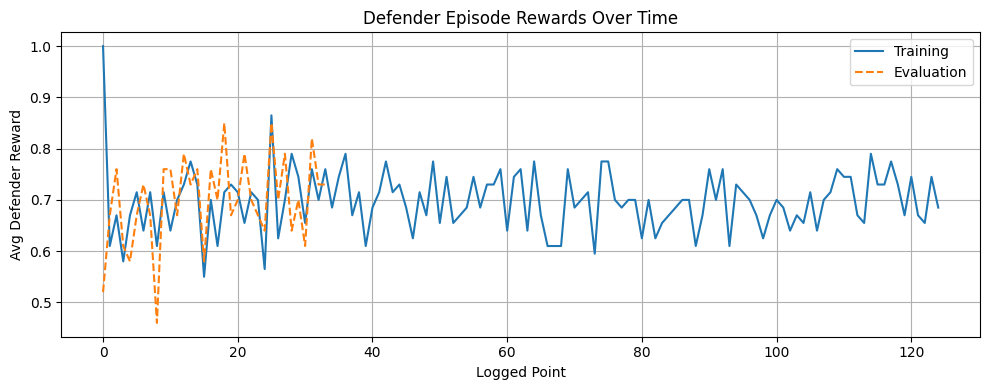

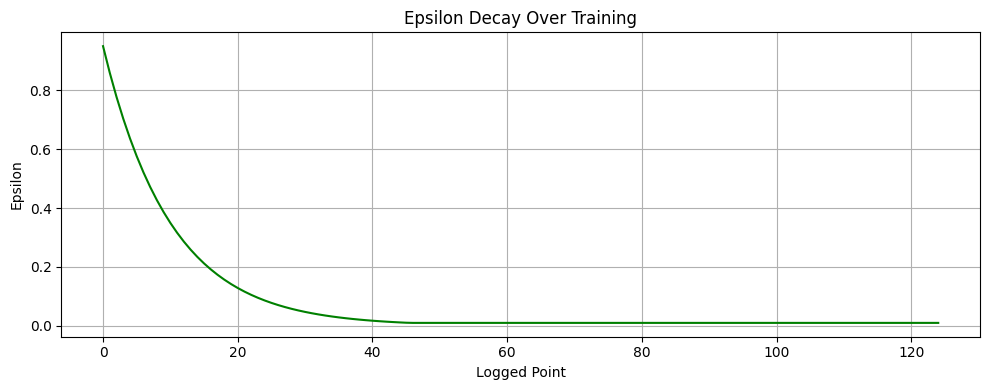

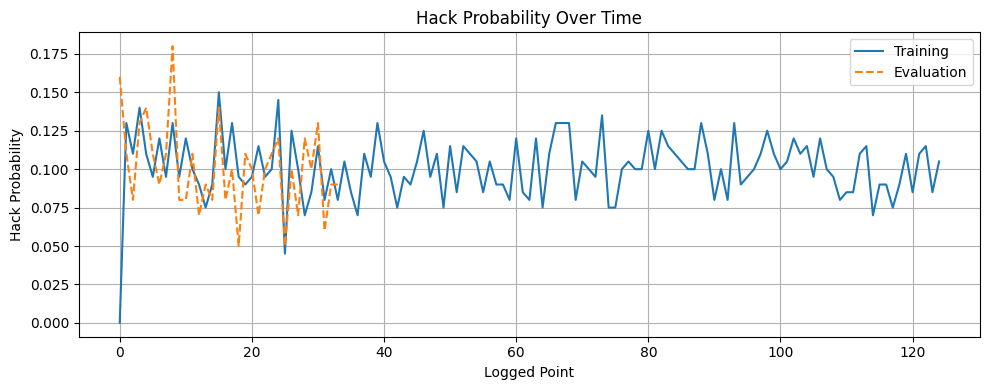

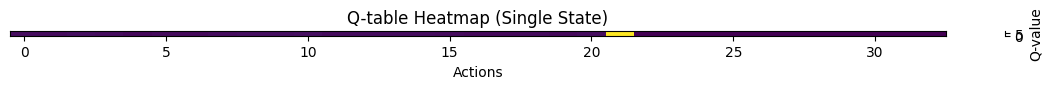

In [16]:
plot_training_evaluation_qtable(
    train_path=os.path.join(sarsa_config.save_dir, "1744398263.3432512_train_results_checkpoint.csv"),
    eval_path=os.path.join(sarsa_config.save_dir, "1744398263.3432512_eval_results_checkpoint.csv"),
    q_table_path=os.path.join(sarsa_config.save_dir, "1744398263.342431_defender_q_table.npy")
)

In [25]:
print_summary(train_result, title = "Training")
print("\n")
print_summary(eval_result, title = "Evaluation")


Training Summary:
--------------------------------------------------
Final Defense Performance:
- Average Reward: 0.70 ± 0.06
- Max-Min Reward: 1.0 - 0.55
- Average Episode Length: 3.04 ± 0.31
- Max-Min Episode Length: 4.77 - 2.0
- Average Hack Probability: 10.09% ± 2.02%
- Max-Min Hack Probability: 0.15 - 0.0
- Final Cumulative Reward: 17203



Evaluation Summary:
--------------------------------------------------
Final Defense Performance:
- Average Reward: 0.70 ± 0.09
- Max-Min Reward: 0.85 - 0.46
- Average Episode Length: 3.01 ± 0.43
- Max-Min Episode Length: 5.27 - 2.68
- Average Hack Probability: 10.03% ± 2.87%
- Max-Min Hack Probability: 0.18 - 0.05
- Final Cumulative Reward: 2377
